### Design a neural Network for classifying news wires (Multi class classification)using Reutersdataset.


In [5]:
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [7]:
# Load data
(data_train, labels_train), (data_test, labels_test) = reuters.load_data(num_words=10000)

In [9]:
# Decode a sample news article
word_index = reuters.get_word_index()
index_to_word = {v: k for k, v in word_index.items()}
decoded = " ".join([index_to_word.get(i - 3, "?") for i in data_train[0]])
print("Sample news:", decoded)

Sample news: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [11]:
# Convert news to vectors
def make_vectors(data, size=10000):
    out = np.zeros((len(data), size))
    for i, line in enumerate(data):
        for word in line:
            out[i, word] = 1.0
    return out

x_train = make_vectors(data_train)
x_test = make_vectors(data_test)

# Convert labels to one-hot
y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)

In [15]:
# Build model
model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

In [19]:
# Compile and train
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
x_train2 = x_train[1000:]
y_val = y_train[:1000]
y_train2 = y_train[1000:]

history = model.fit(x_train2, y_train2, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4293 - loss: 3.1371 - val_accuracy: 0.6200 - val_loss: 1.8260
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6489 - loss: 1.6509 - val_accuracy: 0.6790 - val_loss: 1.4065
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7288 - loss: 1.2537 - val_accuracy: 0.7250 - val_loss: 1.2205
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7845 - loss: 1.0031 - val_accuracy: 0.7670 - val_loss: 1.1168
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8249 - loss: 0.8249 - val_accuracy: 0.7800 - val_loss: 1.0202
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8527 - loss: 0.6892 - val_accuracy: 0.7900 - val_loss: 0.9784
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8735 - loss: 0.5786 - val_accuracy: 0.7900 - val_loss: 0.9695
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8972 - loss: 0.4812 - val_accuracy: 0.7720 - va

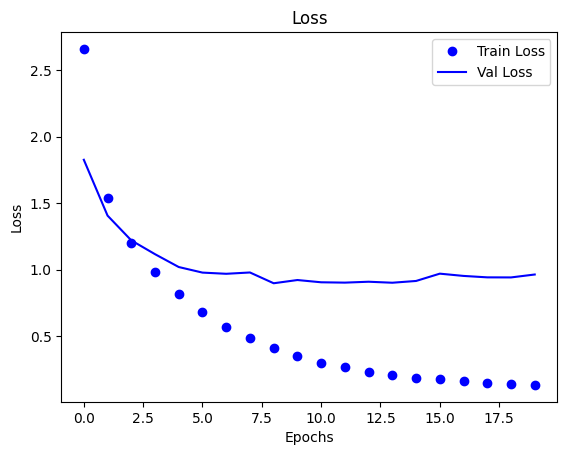

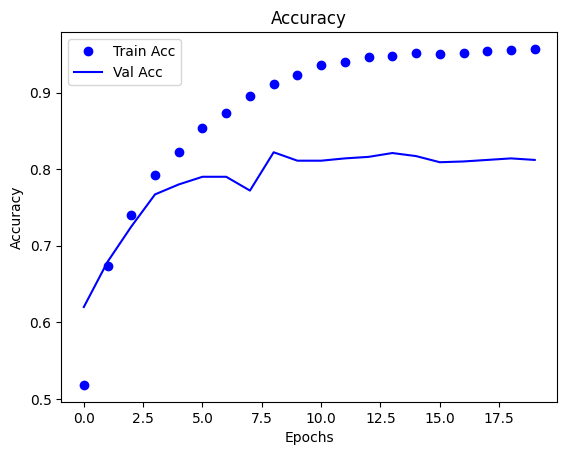

In [23]:
# Plot loss
plt.plot(history.history["loss"], "bo", label="Train Loss")
plt.plot(history.history["val_loss"], "b", label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history["accuracy"], "bo", label="Train Acc")
plt.plot(history.history["val_accuracy"], "b", label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# Retrain and evaluate
model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=9, batch_size=512)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3747 - loss: 3.0733
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6522 - loss: 1.5590
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7398 - loss: 1.2052
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7972 - loss: 0.9588
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8312 - loss: 0.7931
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8612 - loss: 0.6528
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8850 - loss: 0.5400
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9057 - loss: 0.4449
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9185 - loss: 0.3854


In [29]:
result = model.evaluate(x_test, y_test)
print("Final Test Result:", result)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.7979 - loss: 0.9200
Final Test Result: [0.9435156583786011, 0.7885128855705261]


In [31]:
# Predict and inspect
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(46,)
1.0
3
